# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
       
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | meulaboh
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | bandarbeyla
Processing Record 4 of Set 1 | northam
Processing Record 5 of Set 1 | tremedal
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | takoradi
Processing Record 9 of Set 1 | akureyri
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | samusu
City not found. Skipping...
Processing Record 13 of Set 1 | cadillac
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | kurdzhinovo
Processing Record 16 of Set 1 | christchurch
Processing Record 17 of Set 1 | laukaa
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | galashki
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | the pas
Processing Record 22 of Set 1 | hamilton
Pro

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,meulaboh,4.1363,96.1285,74.89,91,69,2.77,ID,1674436362
1,iqaluit,63.7506,-68.5145,-5.31,76,100,24.00,CA,1674436363
2,bandarbeyla,9.4942,50.8122,74.21,69,48,15.57,SO,1674436364
3,northam,51.0333,-4.2167,41.61,80,98,7.43,GB,1674436364
4,tremedal,-14.9758,-41.4108,67.62,97,100,2.55,BR,1674436277


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,meulaboh,4.1363,96.1285,74.89,91,69,2.77,ID,1674436362
1,iqaluit,63.7506,-68.5145,-5.31,76,100,24.00,CA,1674436363
2,bandarbeyla,9.4942,50.8122,74.21,69,48,15.57,SO,1674436364
3,northam,51.0333,-4.2167,41.61,80,98,7.43,GB,1674436364
4,tremedal,-14.9758,-41.4108,67.62,97,100,2.55,BR,1674436277


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

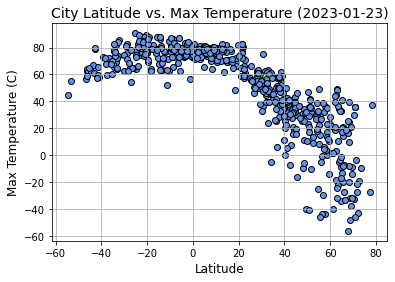

In [43]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, marker='o', facecolors='cornflowerblue', edgecolors='black')


# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (C)', fontsize=12)
plt.title('City Latitude vs. Max Temperature (2023-01-23)', fontsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

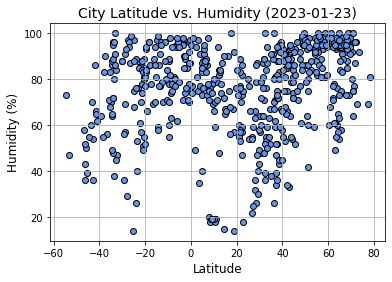

In [44]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, marker='o', facecolors='cornflowerblue', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.title('City Latitude vs. Humidity (2023-01-23)', fontsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

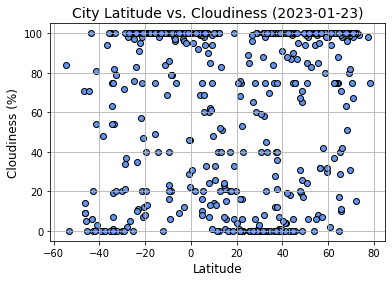

In [45]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, marker='o', facecolors='cornflowerblue', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.title('City Latitude vs. Cloudiness (2023-01-23)', fontsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

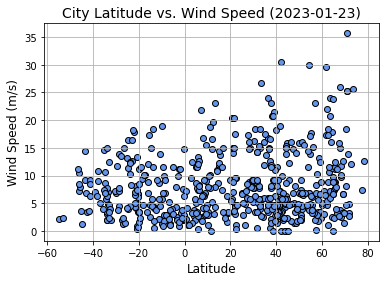

In [46]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, marker='o', facecolors='cornflowerblue', edgecolors='black')


# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.title('City Latitude vs. Wind Speed (2023-01-23)', fontsize=14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, Y_values, text_coordinates):

        # Calculating the linear regression
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

        # Creating the scatter plot
        plt.scatter(x_values,y_values, marker='o', facecolors='cornflowerblue', edgecolors='black')
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq, text_coordinates, fontsize=14,color="red")
        plt.xlabel("Latitude")
        plt.ylabel(y_values.name)
        print(f"The r-value is: {rvalue**2}")
        plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,meulaboh,4.1363,96.1285,74.89,91,69,2.77,ID,1674436362
1,iqaluit,63.7506,-68.5145,-5.31,76,100,24.00,CA,1674436363
2,bandarbeyla,9.4942,50.8122,74.21,69,48,15.57,SO,1674436364
3,northam,51.0333,-4.2167,41.61,80,98,7.43,GB,1674436364
7,takoradi,4.8845,-1.7554,79.30,85,16,5.03,GH,1674436367


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,tremedal,-14.9758,-41.4108,67.62,97,100,2.55,BR,1674436277
5,hobart,-42.8794,147.3294,79.05,54,20,6.91,AU,1674436109
6,hithadhoo,-0.6000,73.0833,80.35,76,46,7.56,MV,1674436366
10,carnarvon,-24.8667,113.6333,78.01,68,76,16.37,AU,1674436370
12,saint-philippe,-21.3585,55.7679,74.79,86,100,4.16,RE,1674436372


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6962725408040639


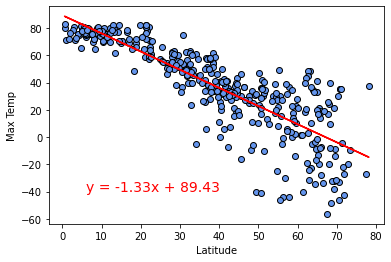

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression_plot(x_values, y_values, (6,-40))


The r-value is: 0.1715514921402867


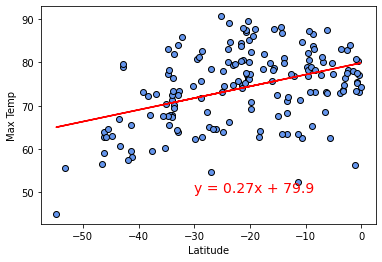

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression_plot(x_values, y_values, (-30,50))


**Discussion about the linear relationship:** 
In the northern hemisphere there is a strong negative relationship between latitude and the max temp.  Meaning that as latitude increases,  max temp decreases.
However in the southern hemisphere there is a weak positive relationship between latitude and max temp.  Meaning that latitude is a weak predictor of max temp there.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10938596218053016


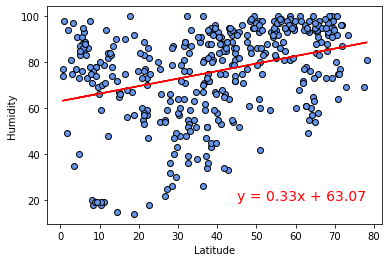

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression_plot(x_values, y_values, (45,20))

The r-value is: 0.17583199792694917


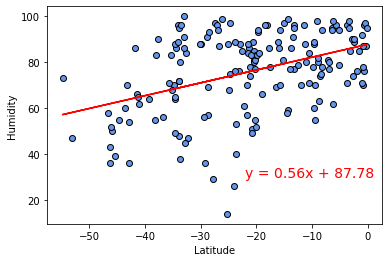

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression_plot(x_values, y_values, (-22,30))

**Discussion about the linear relationship:** 
In both the northern and southern hemipsheres there is a weak positive relationship between latitude and humidity.  So as latitude increases, humidity may increase.  However given the relationship is weak, latitude is not a strong predictor of humidity.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07767853103012116


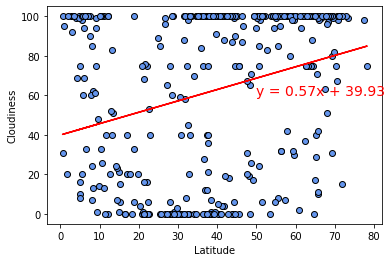

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression_plot(x_values, y_values, (50,60))

The r-value is: 0.19689267492930915


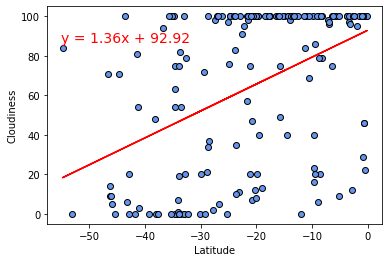

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression_plot(x_values, y_values, (-55,87))

**Discussion about the linear relationship:** 
There is a very weak positive relationship between latitude and cloudiness in the northern hemisphere, and a weak positive relationship between the two in the southern hemisphere.  Meaning latitude is not a good predictor of cloudiness in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.011418249117878485


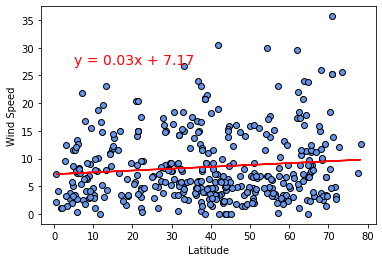

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression_plot(x_values, y_values, (5,27))

The r-value is: 0.018279156462813997


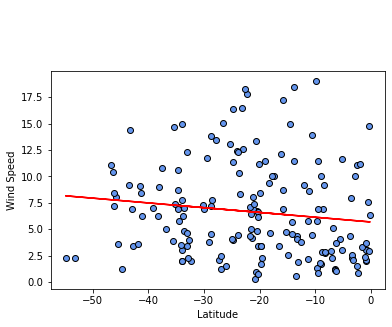

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression_plot(x_values, y_values, (-50,25))

**Discussion about the linear relationship:** 
There is no relationship between latitude and wind speed in either the northern or southern hemisphere.  Meaning that latitude is not a predictor of wind speed.